In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import os

In [2]:
# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建输出文件夹
output_folder = "c:\\programme\\data_science\\artificial intelligence\\homwork_ex\\hw\\hw03\\optics_output"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [3]:
# 加载数据集
try:
    # 尝试从本地加载数据集
    data = pd.read_csv("c:\\programme\\data_science\\artificial intelligence\\homwork_ex\\hw\\hw03\\Mall_Customers.csv")
    print("成功加载本地Mall Customer Segmentation数据集")
except:
    # 如果本地没有，从网络下载
    print("本地未找到数据集，正在尝试下载...")
    try:
        import urllib.request
        url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
        urllib.request.urlretrieve(url, "c:\\programme\\data_science\\artificial intelligence\\homwork_ex\\hw\\hw03\\Mall_Customers.csv")
        data = pd.read_csv("c:\\programme\\data_science\\artificial intelligence\\homwork_ex\\hw\\hw03\\Mall_Customers.csv")
        print("成功下载并加载Mall Customer Segmentation数据集")
    except:
        # 如果下载失败，创建一个示例数据集
        print("下载失败，创建示例数据集...")
        np.random.seed(42)
        n_samples = 200
        
        # 创建示例数据
        age = np.random.randint(18, 70, n_samples)
        annual_income = np.random.randint(15, 100, n_samples)
        spending_score = np.random.randint(1, 100, n_samples)
        gender = np.random.choice(['Male', 'Female'], n_samples)
        customer_id = [f'C{i+1}' for i in range(n_samples)]
        
        # 创建DataFrame
        data = pd.DataFrame({
            'CustomerID': customer_id,
            'Genre': gender,
            'Age': age,
            'Annual Income (k$)': annual_income,
            'Spending Score (1-100)': spending_score
        })
        print("已创建示例Mall Customer Segmentation数据集")

# 查看数据集基本信息
print("\n数据集基本信息:")
print(f"数据集形状: {data.shape}")
print("\n数据集前5行:")
print(data.head())

成功加载本地Mall Customer Segmentation数据集

数据集基本信息:
数据集形状: (200, 5)

数据集前5行:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# 数据预处理
# 数据预处理
# 提取需要用于聚类的特征 - 只使用数值特征
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

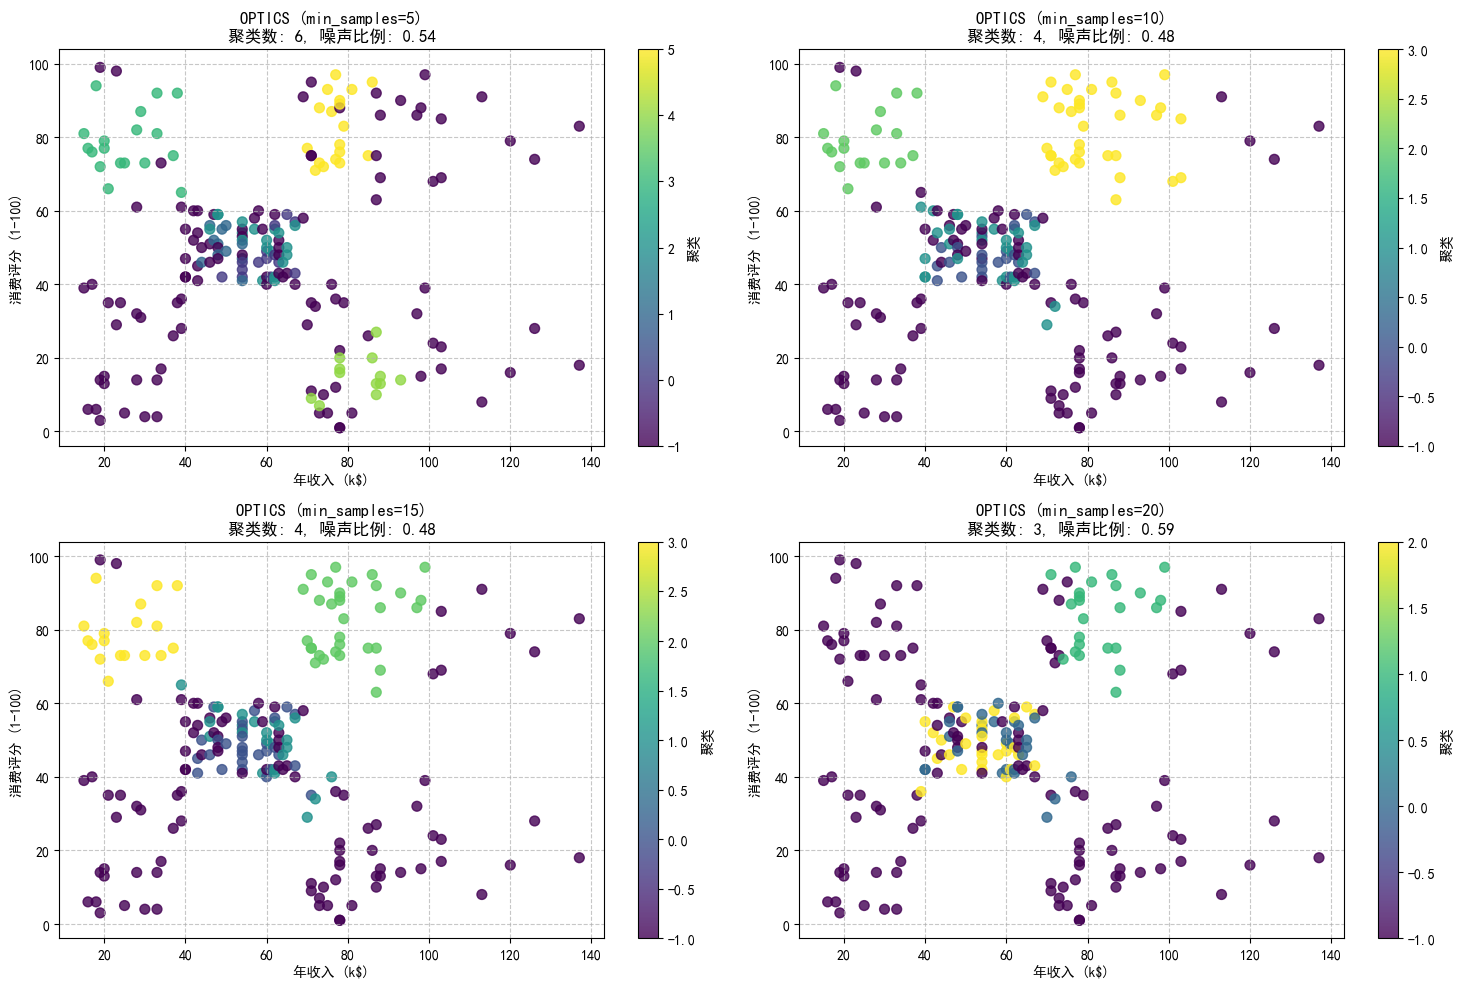

In [6]:
# OPTICS算法参数选择
# 可视化不同min_samples参数的效果
min_samples_range = [5, 10, 15, 20]
plt.figure(figsize=(15, 10))

for i, min_samples in enumerate(min_samples_range):
    # 使用OPTICS算法
    optics = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
    optics_labels = optics.fit_predict(X_scaled)
    
    # 计算噪声点比例
    n_noise = list(optics_labels).count(-1)
    noise_ratio = n_noise / len(optics_labels)
    
    # 计算聚类数量
    n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    
    # 绘制聚类结果
    plt.subplot(2, 2, i+1)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
                c=optics_labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'OPTICS (min_samples={min_samples})\n聚类数: {n_clusters}, 噪声比例: {noise_ratio:.2f}')
    plt.xlabel('年收入 (k$)')
    plt.ylabel('消费评分 (1-100)')
    plt.colorbar(label='聚类')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'optics_min_samples_comparison.png'))
plt.show()

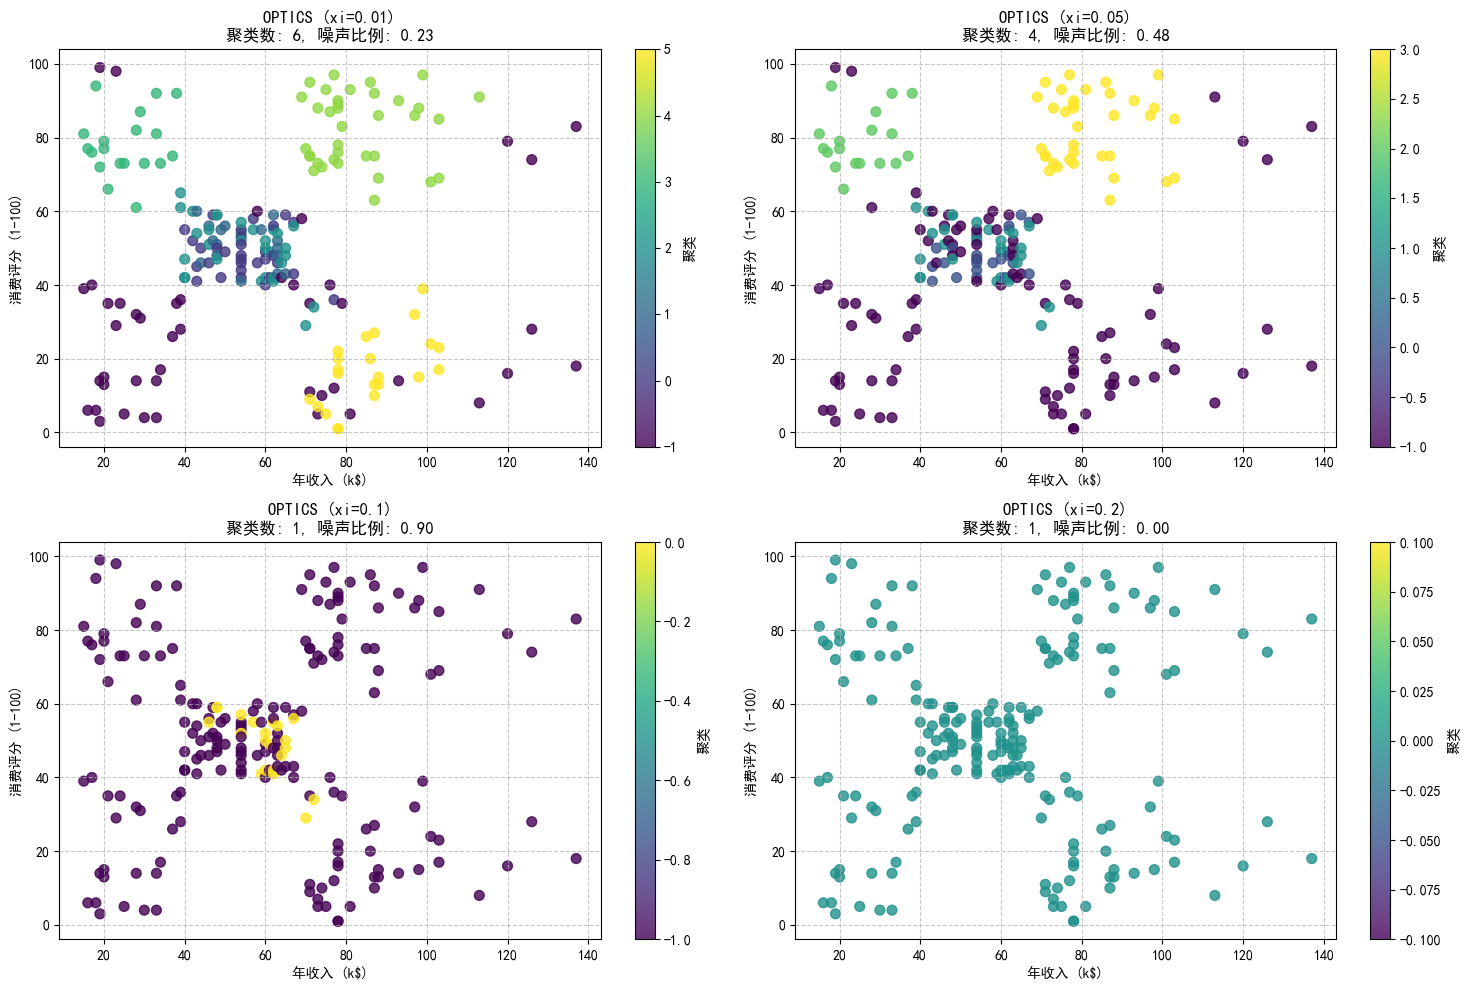

In [7]:
# 可视化不同xi参数的效果
xi_range = [0.01, 0.05, 0.1, 0.2]
plt.figure(figsize=(15, 10))

for i, xi in enumerate(xi_range):
    # 使用OPTICS算法
    optics = OPTICS(min_samples=10, xi=xi, min_cluster_size=0.05)
    optics_labels = optics.fit_predict(X_scaled)
    
    # 计算噪声点比例
    n_noise = list(optics_labels).count(-1)
    noise_ratio = n_noise / len(optics_labels)
    
    # 计算聚类数量
    n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
    
    # 绘制聚类结果
    plt.subplot(2, 2, i+1)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
                c=optics_labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'OPTICS (xi={xi})\n聚类数: {n_clusters}, 噪声比例: {noise_ratio:.2f}')
    plt.xlabel('年收入 (k$)')
    plt.ylabel('消费评分 (1-100)')
    plt.colorbar(label='聚类')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'optics_xi_comparison.png'))
plt.show()


OPTICS聚类数量: 4
噪声点比例: 0.48


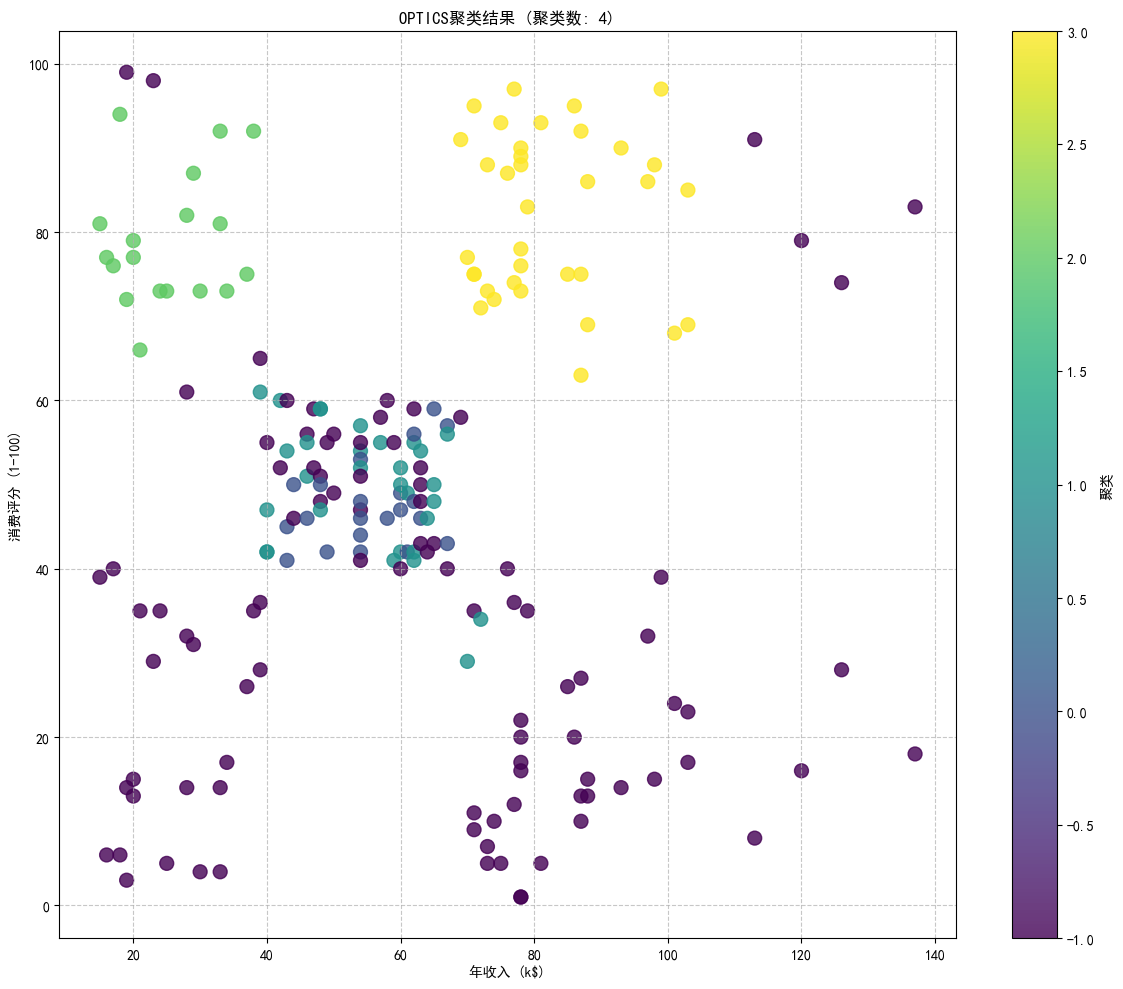

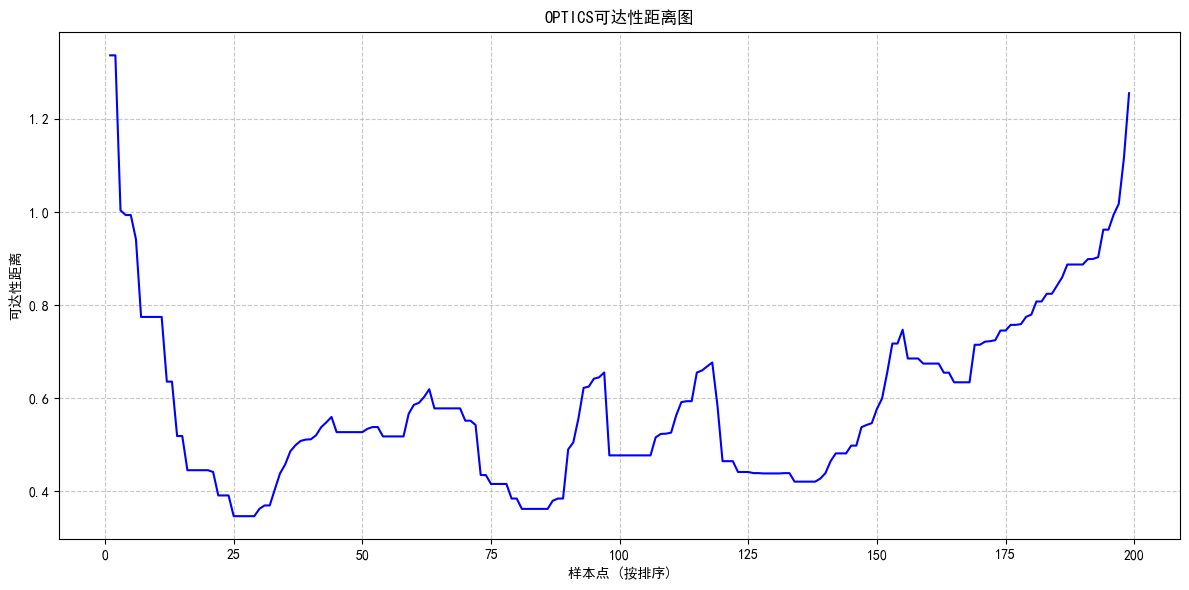

In [8]:
# 选择最佳参数
# 根据上面的可视化结果选择合适的参数
best_min_samples = 10
best_xi = 0.05

# 使用最佳参数运行OPTICS
optics = OPTICS(min_samples=best_min_samples, xi=best_xi, min_cluster_size=0.05)
optics_labels = optics.fit_predict(X_scaled)

# 计算聚类数量
n_clusters = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)
print(f"\nOPTICS聚类数量: {n_clusters}")

# 计算噪声点比例
n_noise = list(optics_labels).count(-1)
noise_ratio = n_noise / len(optics_labels)
print(f"噪声点比例: {noise_ratio:.2f}")

# 将聚类结果添加到原始数据中
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = optics_labels

# 可视化OPTICS聚类结果
plt.figure(figsize=(12, 10))

# 绘制散点图
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
                     c=optics_labels, cmap='viridis', alpha=0.8, s=100)

plt.colorbar(scatter, label='聚类')
plt.title(f"OPTICS聚类结果 (聚类数: {n_clusters})")
plt.xlabel('年收入 (k$)')
plt.ylabel('消费评分 (1-100)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'optics_clusters.png'))
plt.show()

# 可视化OPTICS的可达性距离图
plt.figure(figsize=(12, 6))
space = np.arange(len(X_scaled))
reachability = optics.reachability_[optics.ordering_]
plt.plot(space, reachability, 'b-')
plt.title('OPTICS可达性距离图')
plt.xlabel('样本点 (按排序)')
plt.ylabel('可达性距离')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'optics_reachability.png'))
plt.show()

In [13]:
# 分析每个聚类的特征
def analyze_clusters(data, clusters):
    """分析每个聚类的特征分布"""
    # 添加聚类标签
    data_copy = data.copy()
    data_copy['Cluster'] = clusters
    
    # 计算每个聚类的特征均值 - 只使用数值型列
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # 排除噪声点
    data_without_noise = data_copy[data_copy['Cluster'] != -1]
    
    if len(data_without_noise) > 0:
        cluster_means = data_without_noise.groupby('Cluster')[numeric_cols].mean()
        
        # 绘制热图
        plt.figure(figsize=(12, 8))
        sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('各聚类的特征均值 (不包括噪声点)')
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, 'cluster_features.png'))
        plt.show()
        
        # 绘制箱线图
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
            if i < 4:  # 限制最多显示4个特征
                plt.subplot(2, 2, i+1)
                sns.boxplot(x='Cluster', y=feature, data=data_without_noise)
                plt.title(f'聚类的{feature}分布')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, 'cluster_boxplots.png'))
        plt.show()
        
        # 分析性别分布
        if 'Genre' in data.columns:
            gender_distribution = pd.crosstab(data_without_noise['Cluster'], 
                                             data_without_noise['Genre'], 
                                             normalize='index')
            
            plt.figure(figsize=(10, 6))
            gender_distribution.plot(kind='bar', stacked=True, colormap='viridis')
            plt.title('各聚类的性别分布 (不包括噪声点)')
            plt.xlabel('聚类')
            plt.ylabel('比例')
            plt.legend(title='性别')
            plt.tight_layout()
            plt.savefig(os.path.join(output_folder, 'cluster_gender.png'))
            plt.show()
        
        return cluster_means
    else:
        print("所有点都被标记为噪声，无法分析聚类特征")
        return None

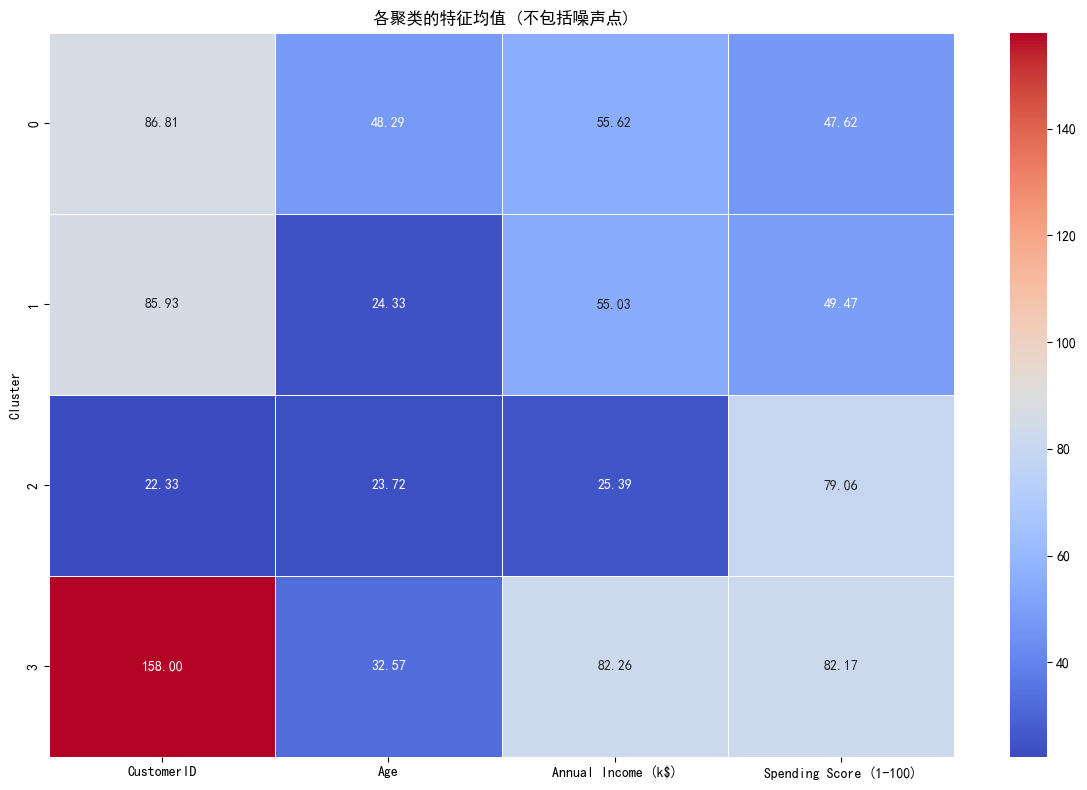

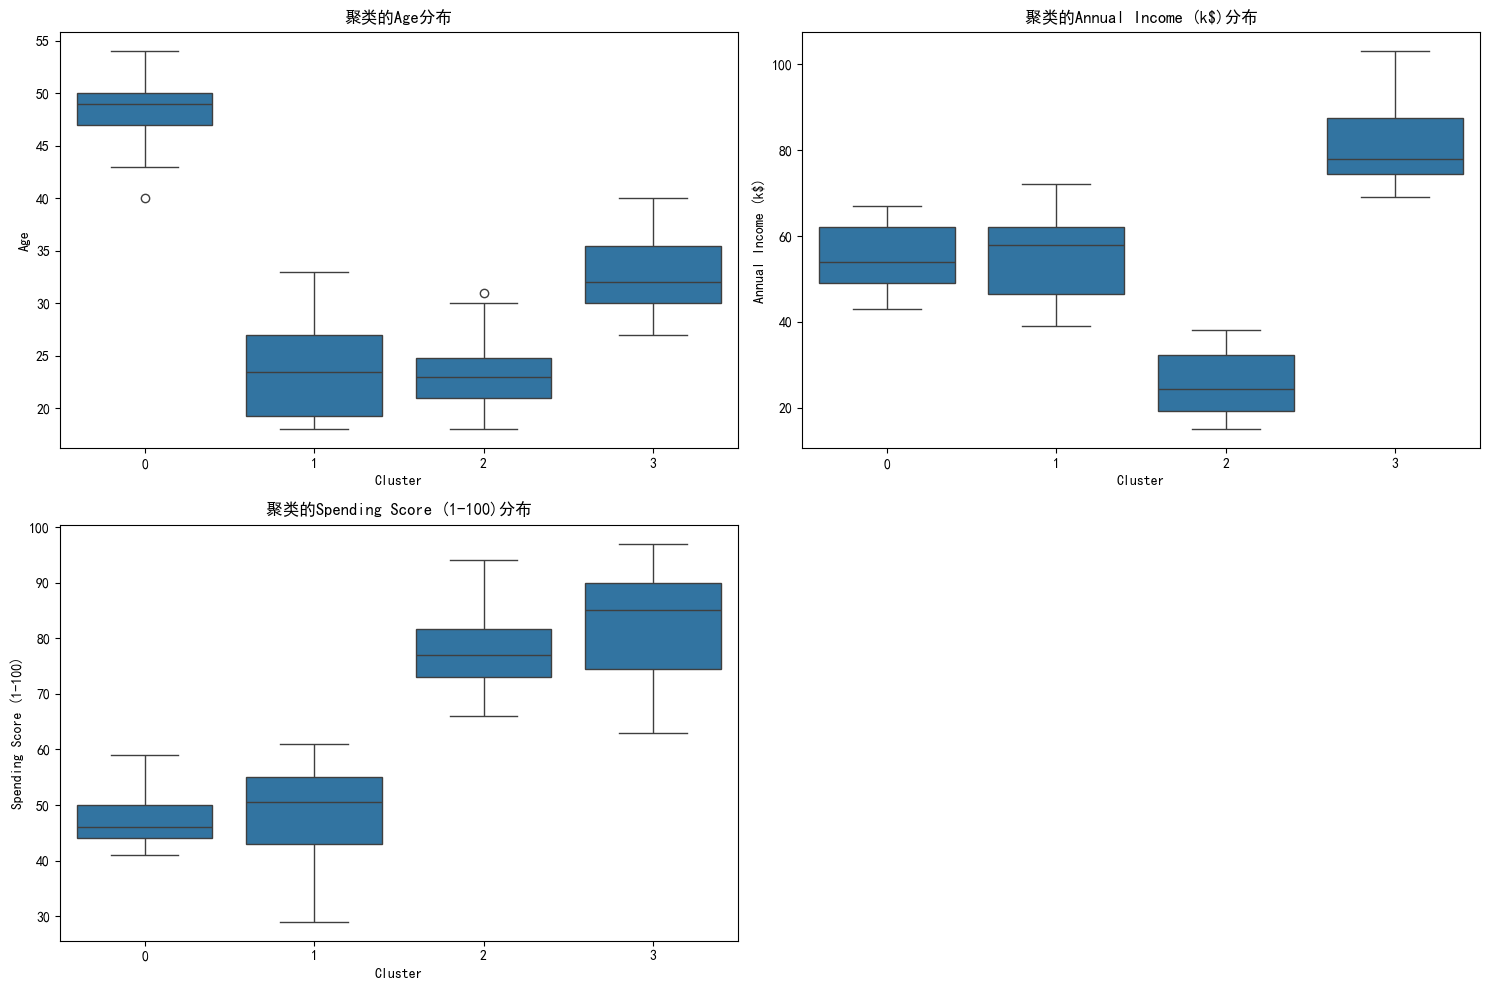

<Figure size 1000x600 with 0 Axes>

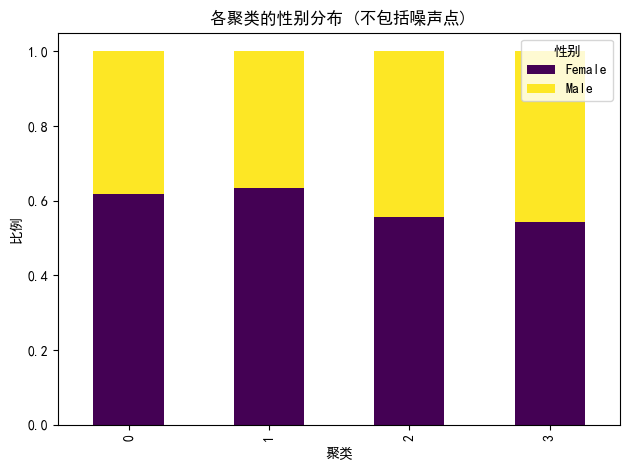


各聚类的特征均值:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.809524  48.285714           55.619048               47.619048
1         85.933333  24.333333           55.033333               49.466667
2         22.333333  23.722222           25.388889               79.055556
3        158.000000  32.571429           82.257143               82.171429


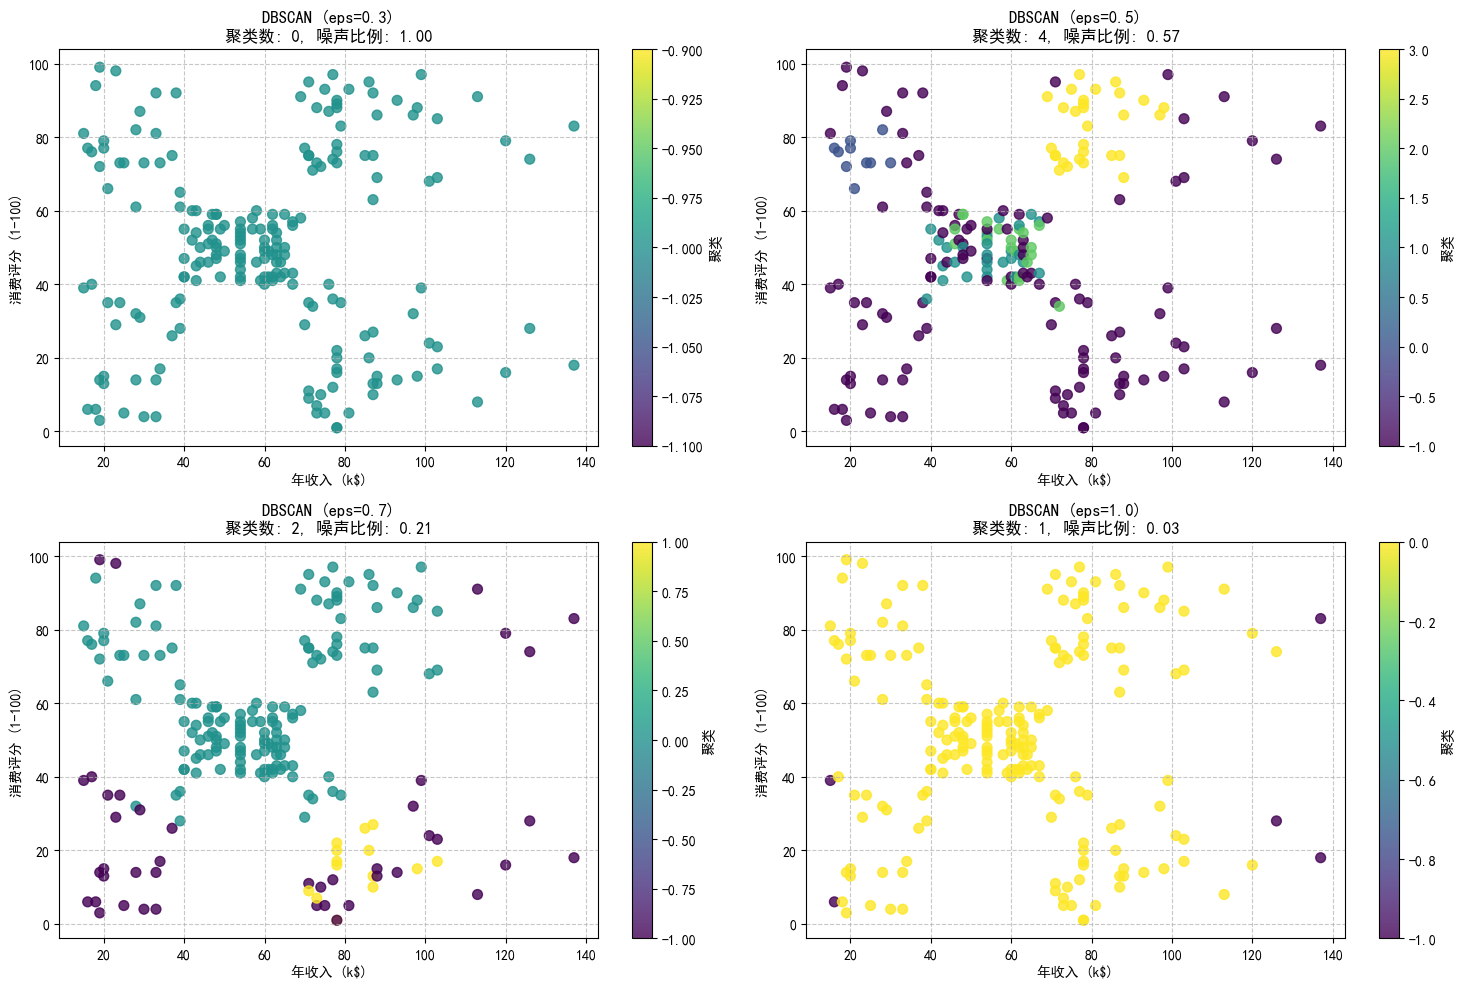


OPTICS和DBSCAN比较:
OPTICS聚类数量: 1, 噪声点比例: 0.03
DBSCAN需要手动指定eps参数，而OPTICS可以自动处理不同密度的聚类

聚类结果已保存至: c:\programme\data_science\artificial intelligence\homwork_ex\hw\hw03\optics_output\optics_clustering_results.csv

OPTICS聚类效果总结:
1. 聚类数量: 1
2. 噪声点比例: 0.03
3. OPTICS能够识别不同密度的聚类
4. 可达性距离图可以帮助理解数据的密度结构
5. 相比K-means，OPTICS不需要预先指定聚类数量


In [12]:
# 分析聚类特征
cluster_means = analyze_clusters(data, optics_labels)
if cluster_means is not None:
    print("\n各聚类的特征均值:")
    print(cluster_means)

# 比较OPTICS和DBSCAN
# 使用相同的min_samples参数运行DBSCAN
eps_values = [0.3, 0.5, 0.7, 1.0]
plt.figure(figsize=(15, 10))

for i, eps in enumerate(eps_values):
    # 使用DBSCAN算法
    dbscan = DBSCAN(eps=eps, min_samples=best_min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    
    # 计算噪声点比例
    n_noise = list(dbscan_labels).count(-1)
    noise_ratio = n_noise / len(dbscan_labels)
    
    # 计算聚类数量
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    
    # 绘制聚类结果
    plt.subplot(2, 2, i+1)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
                c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'DBSCAN (eps={eps})\n聚类数: {n_clusters}, 噪声比例: {noise_ratio:.2f}')
    plt.xlabel('年收入 (k$)')
    plt.ylabel('消费评分 (1-100)')
    plt.colorbar(label='聚类')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'dbscan_comparison.png'))
plt.show()

# 总结OPTICS和DBSCAN的比较
print("\nOPTICS和DBSCAN比较:")
print(f"OPTICS聚类数量: {n_clusters}, 噪声点比例: {noise_ratio:.2f}")
print("DBSCAN需要手动指定eps参数，而OPTICS可以自动处理不同密度的聚类")

# 保存聚类结果
data_with_clusters.to_csv(os.path.join(output_folder, 'optics_clustering_results.csv'), index=False)
print(f"\n聚类结果已保存至: {os.path.join(output_folder, 'optics_clustering_results.csv')}")

# 总结OPTICS聚类效果
print("\nOPTICS聚类效果总结:")
print(f"1. 聚类数量: {n_clusters}")
print(f"2. 噪声点比例: {noise_ratio:.2f}")
print("3. OPTICS能够识别不同密度的聚类")
print("4. 可达性距离图可以帮助理解数据的密度结构")
print("5. 相比K-means，OPTICS不需要预先指定聚类数量")